# Lab 10-2 MNIST with CNN (Keras, weight init)
* Weight Initialization 비교

### 기본 Library 선언 및 Tensorflow 버전 확인

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(tf.__version__)

2.0.0


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Visualize training results
# 네트워크 학습후 결과를 시각화
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(training_epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

### Tensorflow 2.0 버전에 맞게 Keras를 활용한 MNIST를 분류 모델 생성

### Hyper Parameters

In [5]:
learning_rate = 0.01
training_epochs = 5
batch_size = 100

tf.random.set_seed(777)

### Datasets

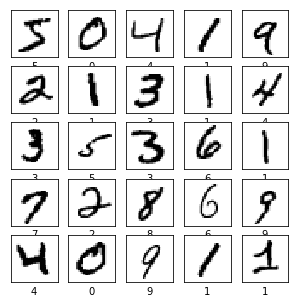

In [6]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)


###  Tensorflow Keras
#### 위 Data를 기준으로 CNN분류 모델 생성
* Tensorflow keras API를 통해 모델에 대한 정의

* (1)SGD Optimizer, activation='sigmoid', kernel_initializer='random_uniform'

In [7]:
model1 = Sequential([
    Conv2D(32, 3, activation='sigmoid', padding='same', input_shape=(28, 28, 1), 
           kernel_initializer='random_uniform'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, activation='sigmoid', padding='same'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(10, activation=tf.nn.softmax)
])

In [10]:
model1.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history11 = model1.fit(train_images, train_labels, validation_data=(test_images, test_labels), 
                       batch_size=batch_size, epochs=training_epochs)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 34s 569us/sample - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/5
60000/60000 [==============================] - 33s 558us/sample - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/5
60000/60000 [==============================] - 34s 562us/sample - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/5
60000/60000 [==============================] - 34s 564us/sample - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/5
60000/60000 [==============================] - 33s 554us/sample - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135


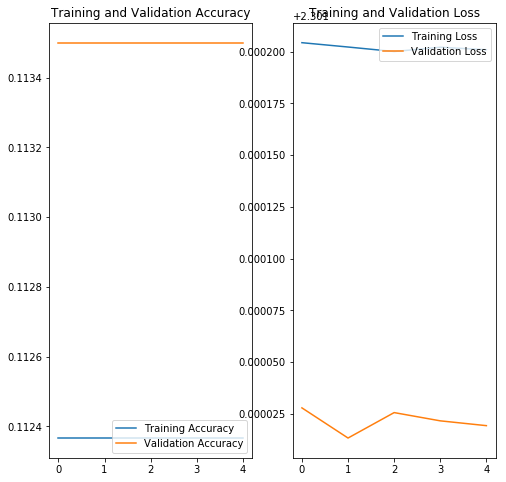

In [12]:
plot_history(history11)

* (2)SGD Optimizer, activation='sigmoid', kernel_initializer='glorot_normal'

In [16]:
model2 = Sequential([
    Conv2D(32, 3, activation='sigmoid', padding='same', kernel_initializer='glorot_normal', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, activation='sigmoid', padding='same'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(10, activation=tf.nn.softmax)
])

In [17]:
model2.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history22 = model2.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=batch_size, epochs=training_epochs)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 35s 580us/sample - loss: 2.3124 - accuracy: 0.1033 - val_loss: 2.3024 - val_accuracy: 0.1028
Epoch 2/5
60000/60000 [==============================] - 35s 585us/sample - loss: 2.3019 - accuracy: 0.1105 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/5
60000/60000 [==============================] - 35s 579us/sample - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/5
60000/60000 [==============================] - 35s 580us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/5
60000/60000 [==============================] - 35s 582us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135


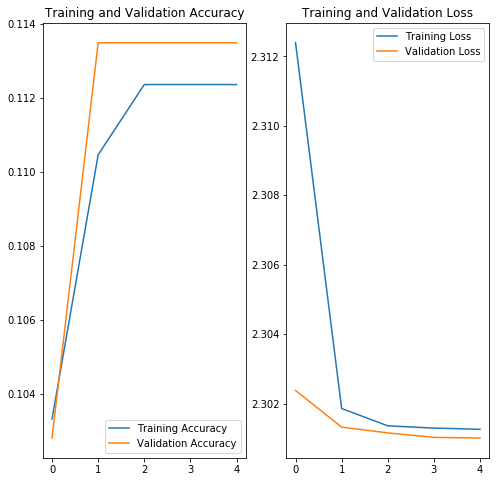

In [19]:
plot_history(history22)

* (3)SGD Optimizer, activation='relu', kernel_initializer='random_uniform'

In [21]:
model3 = Sequential([
    Conv2D(32, 3, activation='relu', kernel_initializer='random_uniform', padding='same', 
           input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(10, activation=tf.nn.softmax)
])

In [22]:
model3.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
history33 = model3.fit(train_images, train_labels, validation_data=(test_images, test_labels), 
                       batch_size=batch_size, epochs=training_epochs)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 35s 585us/sample - loss: 1.4077 - accuracy: 0.6087 - val_loss: 0.3446 - val_accuracy: 0.9015
Epoch 2/5
60000/60000 [==============================] - 34s 566us/sample - loss: 0.3022 - accuracy: 0.9085 - val_loss: 0.2035 - val_accuracy: 0.9402
Epoch 3/5
60000/60000 [==============================] - 34s 571us/sample - loss: 0.2045 - accuracy: 0.9391 - val_loss: 0.1464 - val_accuracy: 0.9568
Epoch 4/5
60000/60000 [==============================] - 35s 585us/sample - loss: 0.1585 - accuracy: 0.9526 - val_loss: 0.1188 - val_accuracy: 0.9648
Epoch 5/5
60000/60000 [==============================] - 35s 579us/sample - loss: 0.1341 - accuracy: 0.9599 - val_loss: 0.1005 - val_accuracy: 0.9691


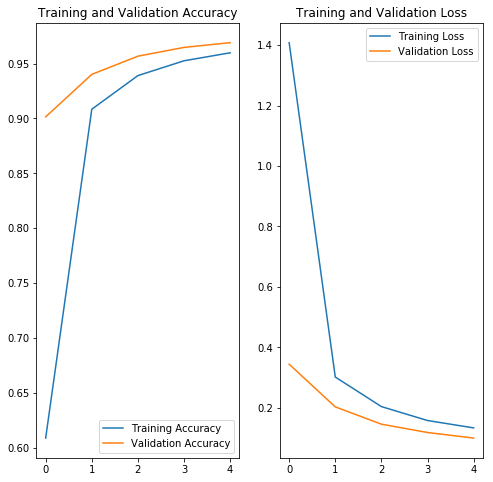

In [24]:
plot_history(history33)

* (4)SGD Optimizer, activation='relu', kernel_initializer='he_uniform'

In [28]:
model4 = Sequential([
    Conv2D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', 
           input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(10, activation=tf.nn.softmax)
])

In [29]:
model4.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
history44 = model4.fit(train_images, train_labels, validation_data=(test_images, test_labels),
                       batch_size=batch_size, epochs=training_epochs)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 36s 593us/sample - loss: 0.4591 - accuracy: 0.8671 - val_loss: 0.1817 - val_accuracy: 0.9486
Epoch 2/5
60000/60000 [==============================] - 35s 591us/sample - loss: 0.1799 - accuracy: 0.9468 - val_loss: 0.1188 - val_accuracy: 0.9662
Epoch 3/5
60000/60000 [==============================] - 35s 582us/sample - loss: 0.1304 - accuracy: 0.9617 - val_loss: 0.0935 - val_accuracy: 0.9709
Epoch 4/5
60000/60000 [==============================] - 35s 580us/sample - loss: 0.1049 - accuracy: 0.9691 - val_loss: 0.0782 - val_accuracy: 0.9771
Epoch 5/5
60000/60000 [==============================] - 34s 572us/sample - loss: 0.0912 - accuracy: 0.9726 - val_loss: 0.0680 - val_accuracy: 0.9787


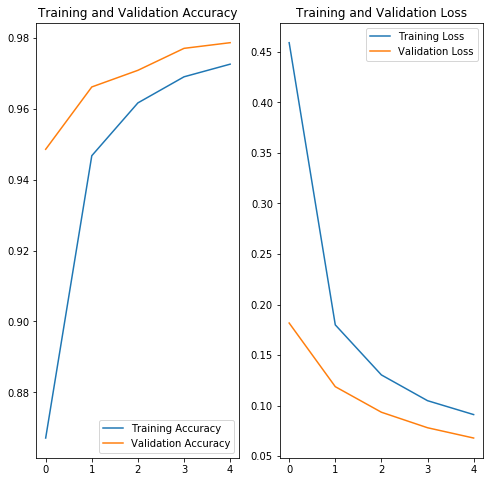

In [31]:
plot_history(history44)

* (4)Adam Optimizer, activation='relu', kernel_initializer='he_uniform'

In [32]:
model5 = Sequential([
    Conv2D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', 
           input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(10, activation=tf.nn.softmax)
])

* (4)Adam Optimizer, activation='relu', kernel_initializer='he_uniform'

In [33]:
model5.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
history55 = model5.fit(train_images, train_labels, validation_data=(test_images, test_labels), 
                       batch_size=batch_size, epochs=training_epochs)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 37s 611us/sample - loss: 0.1247 - accuracy: 0.9600 - val_loss: 0.0370 - val_accuracy: 0.9878
Epoch 2/5
60000/60000 [==============================] - 36s 596us/sample - loss: 0.0402 - accuracy: 0.9876 - val_loss: 0.0360 - val_accuracy: 0.9890
Epoch 3/5
60000/60000 [==============================] - 35s 592us/sample - loss: 0.0292 - accuracy: 0.9906 - val_loss: 0.0253 - val_accuracy: 0.9922
Epoch 4/5
60000/60000 [==============================] - 36s 593us/sample - loss: 0.0205 - accuracy: 0.9935 - val_loss: 0.0239 - val_accuracy: 0.9924
Epoch 5/5
60000/60000 [==============================] - 36s 602us/sample - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.0331 - val_accuracy: 0.9899ss: 0.0150 - accu


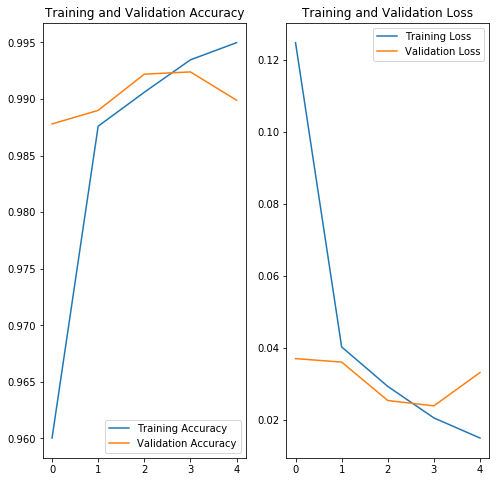

In [35]:
plot_history(history55)

* (4)Adam Optimizer, activation='relu', kernel_initializer='he_normal'

In [36]:
model6 = Sequential([
    Conv2D(32, 3, activation='relu', kernel_initializer='he_normal', padding='same', 
           input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(10, activation=tf.nn.softmax)
])

In [37]:
model6.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
history66 = model6.fit(train_images, train_labels, validation_data=(test_images, test_labels), 
                       batch_size=batch_size, epochs=training_epochs)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 36s 606us/sample - loss: 0.1291 - accuracy: 0.9603 - val_loss: 0.0440 - val_accuracy: 0.9863
Epoch 2/5
60000/60000 [==============================] - 36s 602us/sample - loss: 0.0398 - accuracy: 0.9875 - val_loss: 0.0378 - val_accuracy: 0.9878
Epoch 3/5
60000/60000 [==============================] - 35s 584us/sample - loss: 0.0271 - accuracy: 0.9912 - val_loss: 0.0232 - val_accuracy: 0.9921
Epoch 4/5
60000/60000 [==============================] - 36s 598us/sample - loss: 0.0194 - accuracy: 0.9937 - val_loss: 0.0402 - val_accuracy: 0.9878
Epoch 5/5
60000/60000 [==============================] - 34s 574us/sample - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.0280 - val_accuracy: 0.9911


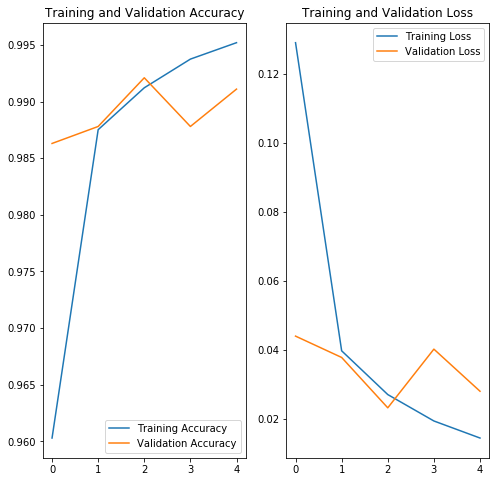

In [39]:
plot_history(history66)

## Visualize training results

#### 네트워크 학습후 결과를 시각화

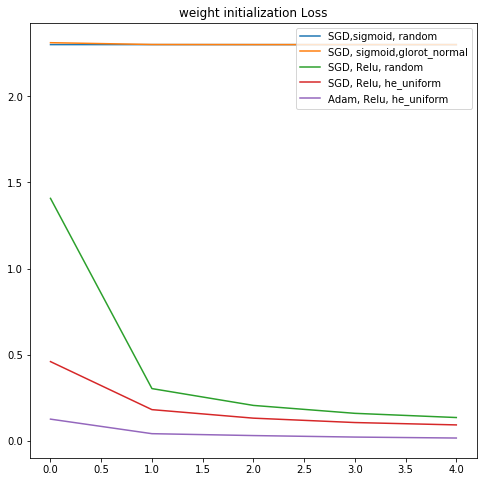

In [41]:

loss1=history11.history['loss']
loss2=history22.history['loss']
loss3=history33.history['loss']
loss4=history44.history['loss']
loss5=history55.history['loss']
loss6=history66.history['loss']

epochs_range = range(training_epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, loss1, label='SGD,sigmoid, random')
plt.plot(epochs_range, loss2, label='SGD, sigmoid,glorot_normal')
plt.plot(epochs_range, loss3, label='SGD, Relu, random')
plt.plot(epochs_range, loss4, label='SGD, Relu, he_uniform')
plt.plot(epochs_range, loss5, label='Adam, Relu, he_uniform')
plt.legend(loc='upper right')
plt.title('weight initialization Loss')
plt.show()